In [1]:
import pandas as pd

# Load the full dataset
df = pd.read_csv("tweets_ai_jobs.csv")

# Show the first few rows
df.head()

,date,tweet
0,1/1/2023,The automation age could widen economic dispar...
1,2/1/2023,Artificial Ingelligence Replacing Humans: Is Y...
2,3/1/2023,One potential concern about artificial intelli...
3,3/1/2023,"When we talk about AI taking jobs, AI destroyi..."
4,3/1/2023,The automation age could widen economic dispar...


In [2]:
# Check how many duplicate tweets exist
duplicate_count = df.duplicated(subset="tweet").sum()
print(f"Number of duplicate tweets: {duplicate_count}")


Number of duplicate tweets: 0


In [3]:
import re

def clean_tweet(tweet):
    tweet = str(tweet).lower()  # Lowercase
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)  # Remove URLs
    tweet = re.sub(r"@\w+", "", tweet)  # Remove mentions
    tweet = re.sub(r"#", "", tweet)  # Remove hashtag symbols only
    tweet = re.sub(r"[^\w\s]", "", tweet)  # Remove punctuation/special characters
    tweet = re.sub(r"\s+", " ", tweet).strip()  # Remove extra whitespace
    return tweet

# Apply to dataset
df["clean_tweet"] = df["tweet"].apply(clean_tweet)

# Preview cleaned data
df[["tweet", "clean_tweet"]].head()


,tweet,clean_tweet
0,The automation age could widen economic dispar...,the automation age could widen economic dispar...
1,Artificial Ingelligence Replacing Humans: Is Y...,artificial ingelligence replacing humans is yo...
2,One potential concern about artificial intelli...,one potential concern about artificial intelli...
3,"When we talk about AI taking jobs, AI destroyi...",when we talk about ai taking jobs ai destroyin...
4,The automation age could widen economic dispar...,the automation age could widen economic dispar...


In [4]:
!pip install -q transformers torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.eval().cuda()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [6]:
# Map model output indices to sentiment labels
id2label = {0: "negative", 1: "neutral", 2: "positive"}


In [7]:
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to("cuda")
    with torch.no_grad():
        outputs = model(**inputs)
        scores = torch.nn.functional.softmax(outputs.logits, dim=1)
        predicted = torch.argmax(scores, dim=1).item()
    return id2label[predicted]


In [8]:
# Apply prediction to each cleaned tweet
df["model_prediction"] = df["clean_tweet"].apply(predict_sentiment)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [9]:
# Save to CSV
df.to_csv("tweets_ai_jobs_with_sentiment.csv", index=False)

In [10]:
df = pd.read_csv("tweets_ai_jobs_with_sentiment.csv")
df.head()

,date,tweet,clean_tweet,model_prediction
0,1/1/2023,The automation age could widen economic dispar...,the automation age could widen economic dispar...,neutral
1,2/1/2023,Artificial Ingelligence Replacing Humans: Is Y...,artificial ingelligence replacing humans is yo...,negative
2,3/1/2023,One potential concern about artificial intelli...,one potential concern about artificial intelli...,negative
3,3/1/2023,"When we talk about AI taking jobs, AI destroyi...",when we talk about ai taking jobs ai destroyin...,negative
4,3/1/2023,The automation age could widen economic dispar...,the automation age could widen economic dispar...,neutral


In [11]:
# Count how many tweets fall into each sentiment
sentiment_counts = df["model_prediction"].value_counts()

print("Sentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
model_prediction
neutral     6843
negative    6002
positive    2058
Name: count, dtype: int64


In [12]:
!pip install -q seaborn matplotlib wordcloud


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-14-1e9b337f8fef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


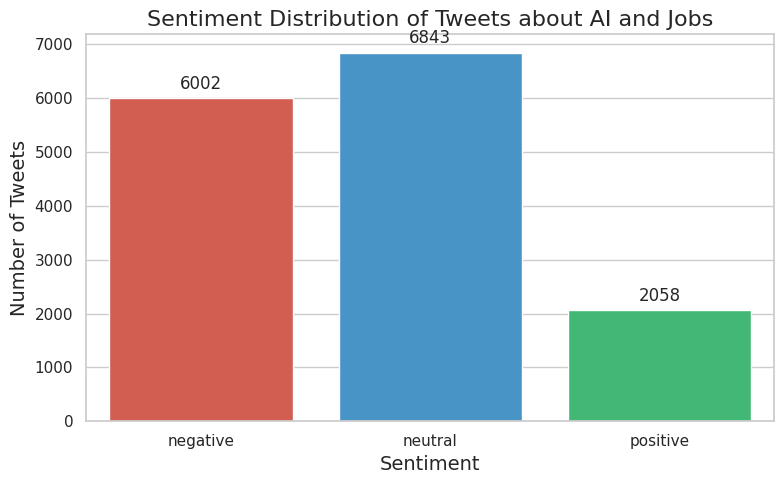

In [14]:
# Set seaborn style
sns.set(style="whitegrid")

# Reorder sentiment counts
sentiment_order = ["negative", "neutral", "positive"]
sentiment_counts = df["model_prediction"].value_counts().reindex(sentiment_order)

# Define custom colors
custom_colors = ["#e74c3c", "#3498db", "#2ecc71"]  # red, blue, green

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=custom_colors
)

# Add value labels
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title("Sentiment Distribution of Tweets about AI and Jobs", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)

plt.tight_layout()
plt.show()


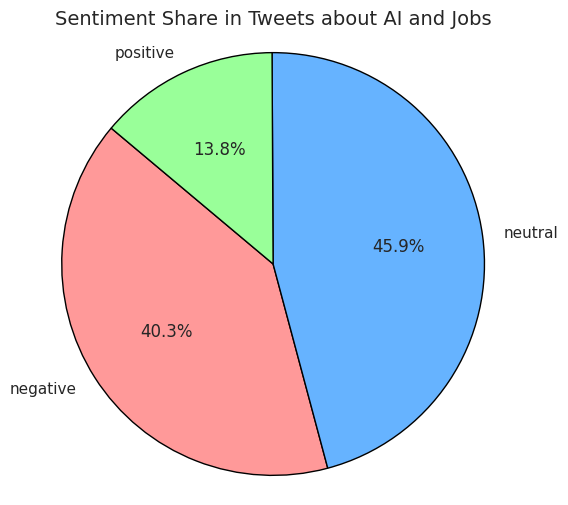

In [15]:
# Reuse sentiment counts
sentiment_counts = df["model_prediction"].value_counts().reindex(["negative", "neutral", "positive"])

# Define colors (optional)
colors = ["#ff9999", "#66b3ff", "#99ff99"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Sentiment Share in Tweets about AI and Jobs", fontsize=14)
plt.axis("equal")  # Equal aspect ratio ensures it’s a circle
plt.show()


In [16]:
# Ensure 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["date"])


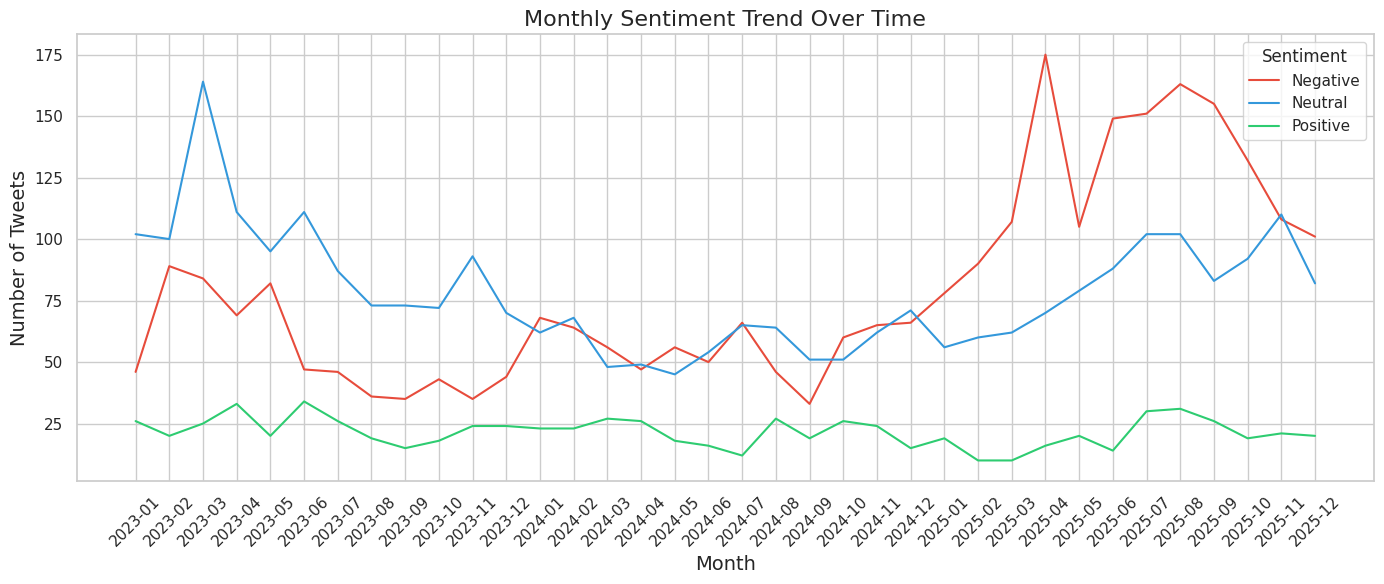

In [17]:
# Group by month instead of individual days
df["month"] = pd.to_datetime(df["date"]).dt.to_period("M").astype(str)

monthly_sentiment = df.groupby(["month", "model_prediction"]).size().reset_index(name="count")
monthly_pivot = monthly_sentiment.pivot(index="month", columns="model_prediction", values="count").fillna(0)

# Plot
plt.figure(figsize=(14, 6))
for sentiment, color in zip(["negative", "neutral", "positive"], ["#e74c3c", "#3498db", "#2ecc71"]):
    if sentiment in monthly_pivot.columns:
        plt.plot(monthly_pivot.index, monthly_pivot[sentiment], label=sentiment.capitalize(), color=color)

plt.title("Monthly Sentiment Trend Over Time", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


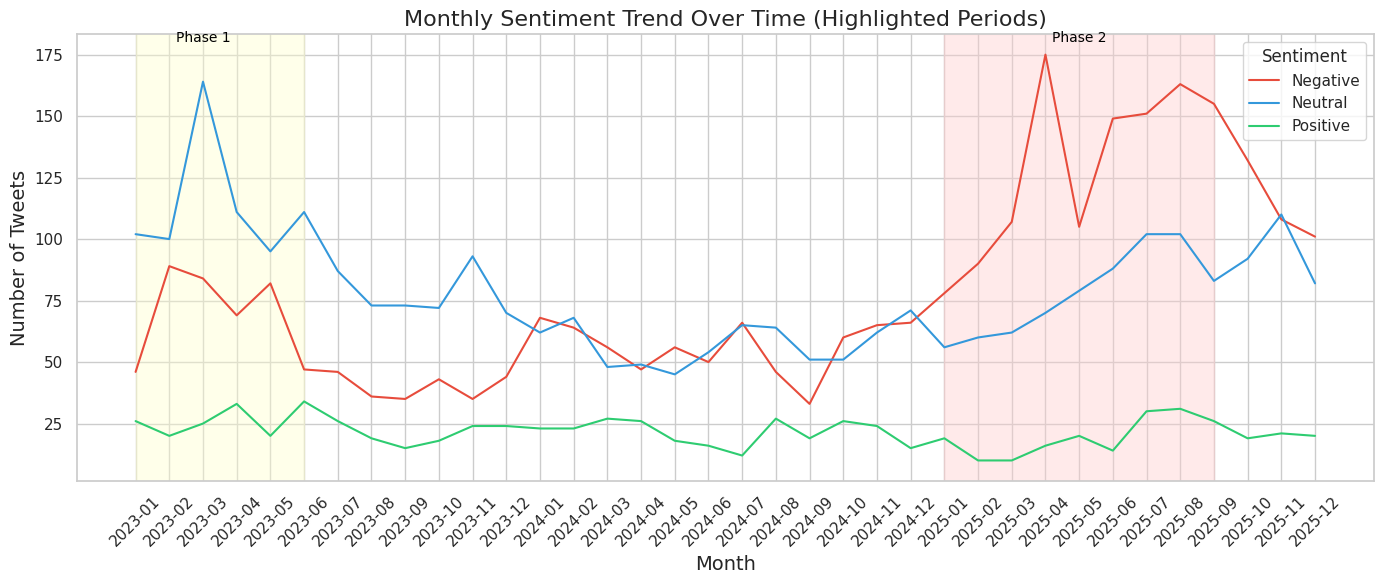

In [18]:
# Re-plot with highlights
plt.figure(figsize=(14, 6))

# Plot each sentiment line
for sentiment, color in zip(["negative", "neutral", "positive"], ["#e74c3c", "#3498db", "#2ecc71"]):
    if sentiment in monthly_pivot.columns:
        plt.plot(monthly_pivot.index, monthly_pivot[sentiment], label=sentiment.capitalize(), color=color)

# Highlight Period 1 (early rise in negativity)
plt.axvspan("2023-01", "2023-06", color="#ffffcc", alpha=0.4)  # soft yellow
plt.text("2023-03", max(monthly_pivot.max()) + 5, "Phase 1", fontsize=10, ha="center", color="black")

# Highlight Period 2 (later, stronger negativity)
plt.axvspan("2025-01", "2025-09", color="#ffcccc", alpha=0.4)  # soft red
plt.text("2025-05", max(monthly_pivot.max()) + 5, "Phase 2", fontsize=10, ha="center", color="black")

# Labels and formatting
plt.title("Monthly Sentiment Trend Over Time (Highlighted Periods)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


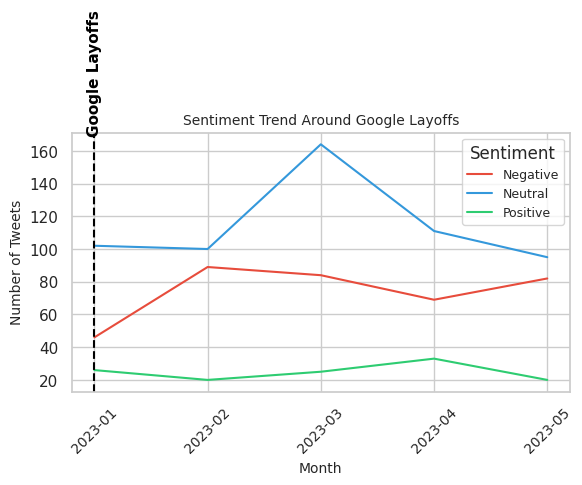

In [23]:
# Focus only on a narrow window around Google layoffs
zoom_data = monthly_pivot.loc["2023-01":"2023-05"]
# Zoomed in chart with tighter x-axis appearance
plt.figure(figsize=(6, 5))

# Plot sentiment lines
for sentiment, color in zip(["negative", "neutral", "positive"], ["#e74c3c", "#3498db", "#2ecc71"]):
    if sentiment in zoom_data.columns:
        plt.plot(zoom_data.index, zoom_data[sentiment], label=sentiment.capitalize(), color=color)

# Vertical line for Google Layoffs
plt.axvline(x="2023-01", color="black", linestyle="--", linewidth=1.5)

plt.text("2023-01", zoom_data.max().max() + 5, "Google Layoffs", rotation=90,
         fontsize=11, fontweight="bold", color="black", ha="center", va="bottom")

# Titles and formatting
plt.title("Sentiment Trend Around Google Layoffs", fontsize=10)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Number of Tweets", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sentiment", fontsize=9)
plt.tight_layout()
plt.show()

In [24]:
!pip install -q wordcloud


In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter tweets by sentiment
negative_text = " ".join(df[df["model_prediction"] == "negative"]["clean_tweet"])
positive_text = " ".join(df[df["model_prediction"] == "positive"]["clean_tweet"])


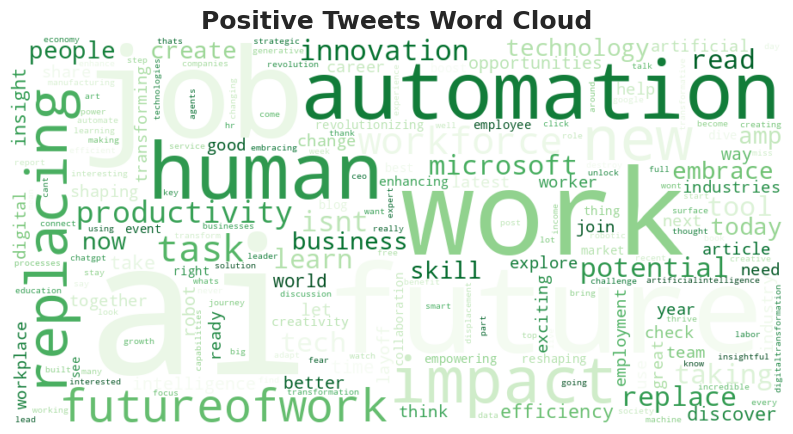

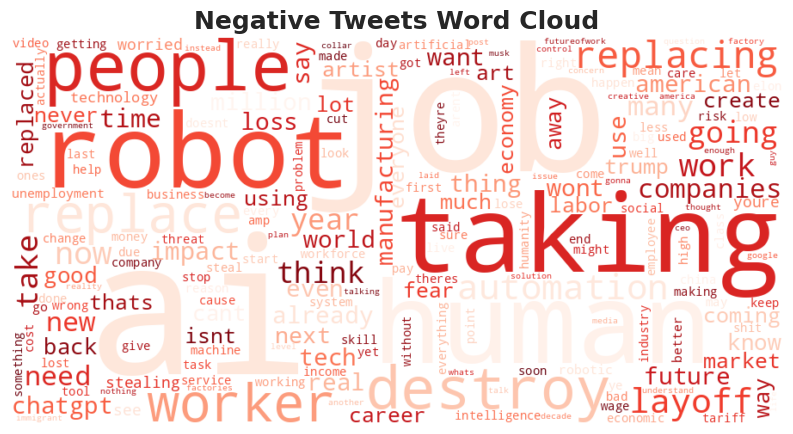

In [27]:
# 1. Define extended stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "will", "can", "get", "one", "would", "make", "u", "im", "us", "dont", "also", "still"
])

# 2. Word cloud function with full text cleanup
def make_wc(text_series, title, colormap):
    # Lowercase and join tweets
    cleaned_text = " ".join(text_series).lower()

    # Generate word cloud
    wc = WordCloud(
        width=900,
        height=450,
        stopwords=custom_stopwords,
        background_color='white',
        colormap=colormap,
        collocations=False,
        random_state=42
    ).generate(cleaned_text)

    # Plot
    plt.figure(figsize=(9, 4.5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 3. Generate word clouds
make_wc(df[df['model_prediction'] == 'positive']['clean_tweet'], 'Positive Tweets Word Cloud', 'Greens')
make_wc(df[df['model_prediction'] == 'negative']['clean_tweet'], 'Negative Tweets Word Cloud', 'Reds')

In [29]:
df = pd.read_csv("tweets_ai_jobs_with_sentiment.csv")
df.head()


,date,tweet,clean_tweet,model_prediction
0,1/1/2023,The automation age could widen economic dispar...,the automation age could widen economic dispar...,neutral
1,2/1/2023,Artificial Ingelligence Replacing Humans: Is Y...,artificial ingelligence replacing humans is yo...,negative
2,3/1/2023,One potential concern about artificial intelli...,one potential concern about artificial intelli...,negative
3,3/1/2023,"When we talk about AI taking jobs, AI destroyi...",when we talk about ai taking jobs ai destroyin...,negative
4,3/1/2023,The automation age could widen economic dispar...,the automation age could widen economic dispar...,neutral


In [45]:
# -----------------------------------------------------------
# TOPIC‑MODELLING WITH BERTopic
# -----------------------------------------------------------
!pip -q install bertopic sentence-transformers umap-learn hdbscan

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

# 1. Load the CSV that already has RoBERTa predictions & clean text
df = pd.read_csv('tweets_ai_jobs_with_sentiment.csv')

# 2. Prepare the text list (fill NaN, cast to str)
texts = (
    df['clean_tweet']          # column created earlier
      .fillna('')              # replace NaN with empty string
      .astype(str)             # ensure every element is a string
      .tolist()
)

# 3. Initialise BERTopic
embed_model = SentenceTransformer("all-MiniLM-L6-v2")  # small, fast, good for tweets
topic_model = BERTopic(
    embedding_model=embed_model,
    min_topic_size=25,         # tweak up/down for fewer/more clusters
    top_n_words=10,
    verbose=True
)

# 4. Fit & transform
topics, probs = topic_model.fit_transform(texts)

# 5. Attach topic labels back to the dataframe
df['topic'] = topics          # -1 means 'outlier/noise'

# 6. Save dataframe for later use
df.to_csv('tweet_ai_jobs_topics.csv', index=False)
print("✅ Topics assigned & saved → tweet_ai_jobs_roberta_topics.csv")

# 7. Quick peek at top topics
topic_model.get_topic_info().head(10)


2025-05-03 21:35:58,815 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/466 [00:00<?, ?it/s]

2025-05-03 21:36:07,188 - BERTopic - Embedding - Completed ✓
2025-05-03 21:36:07,191 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-03 21:36:21,119 - BERTopic - Dimensionality - Completed ✓
2025-05-03 21:36:21,120 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-03 21:36:21,904 - BERTopic - Cluster - Completed ✓
2025-05-03 21:36:21,911 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-03 21:36:22,335 - BERTopic - Representation - Completed ✓


✅ Topics assigned & saved → tweet_ai_jobs_roberta_topics.csv


,Topic,Count,Name,Representation,Representative_Docs
0,-1,5292,-1_the_and_ai_to,"[the, and, ai, to, of, in, is, jobs, will, rob...",[he is not taking into account new tech and ma...
1,0,977,0_destroy_will_jobs_it,"[destroy, will, jobs, it, be, create, that, to...",[ai will take our jobs and destroy the world a...
2,1,926,1_layoffs_layoff_employees_to,"[layoffs, layoff, employees, to, tech, off, ai...",[why tech companies are laying off thousands o...
3,2,841,2_impact_on_jobs_ais,"[impact, on, jobs, ais, of, the, ai, job, and,...","[the impact of ai on jobs, the impact of ai on..."
4,3,561,3_taking_about_jobs_worried,"[taking, about, jobs, worried, people, fear, a...","[ai taking jobs, ai taking jobs, ai taking jobs]"
5,4,559,4_art_artists_it_that,"[art, artists, it, that, and, people, is, arti...",[ai will never replace good art or artists if ...
6,5,376,5_automation_replacing_humans_about,"[automation, replacing, humans, about, isnt, t...",[automation is not about replacing humans its ...
7,6,303,6_automation_workforce_future_work,"[automation, workforce, future, work, and, fut...",[ai automation is revolutionizing industries i...
8,7,286,7_robots_taking_jobs_are,"[robots, taking, jobs, are, over, our, they, a...","[robots will be taking the jobs not people, ar..."
9,8,257,8_microsoft_event_march_work,"[microsoft, event, march, work, future, 16th, ...",[microsoft to detail the future of work with a...


In [46]:
fig = topic_model.visualize_barchart(top_n_topics=10); fig.show()

In [47]:
sent_order = ['negative', 'neutral', 'positive']

cross = (
    df[df.topic != -1]                      # ignore outliers
      .groupby(['topic', 'model_prediction'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=sent_order)
)

# add totals & percentage columns
cross['total'] = cross.sum(axis=1)
cross_pct = (cross[sent_order].div(cross['total'], axis=0) * 100).round(1)

cross.head(10)

model_prediction,negative,neutral,positive,total
topic,,,,
0,813,129,35,977
1,440,442,44,926
2,96,572,173,841
3,334,200,27,561
4,382,144,33,559
5,110,180,86,376
6,6,146,151,303
7,219,62,5,286
8,11,153,93,257


In [48]:
topic_names = {
    0: "AI destroying jobs",
    1: "Tech layoffs & employment",
    2: "General discussion on AI impact",
    3: "Public fear and job anxiety",
    4: "AI vs creative professions",
    5: "Automation replacing humans",
    6: "Workforce and future of work",
    7: "Robots taking over jobs",
    8: "Microsoft AI event / news",
    9: "AI stealing your job"
}


In [49]:
cross_pct.insert(0, 'Topic name', cross_pct.index.map(topic_names))
cross_pct.reset_index(inplace=True)
cross_pct.head()


model_prediction,topic,Topic name,negative,neutral,positive
0,0,AI destroying jobs,83.2,13.2,3.6
1,1,Tech layoffs & employment,47.5,47.7,4.8
2,2,General discussion on AI impact,11.4,68.0,20.6
3,3,Public fear and job anxiety,59.5,35.7,4.8
4,4,AI vs creative professions,68.3,25.8,5.9


In [50]:
df = pd.read_csv('tweet_ai_jobs_topics.csv')

In [51]:
top10 = (
    df[df.topic != -1]
      .value_counts('topic')
      .head(10)
      .index.tolist()
)

In [52]:
df['topic_major'] = df['topic'].where(df['topic'].isin(top10), other='Other')

In [53]:
topic_names = {
    0: "AI destroying jobs",
    1: "Tech layoffs & employment",
    2: "General discussion on AI impact",
    3: "Public fear and job anxiety",
    4: "AI vs creative professions",
    5: "Automation replacing humans",
    6: "Workforce and future of work",
    7: "Robots taking over jobs",
    8: "Microsoft AI event / news",
    9: "AI stealing your job",
    'Other': "Other (minor topics)"
}
df['topic_label'] = df['topic_major'].map(topic_names)

In [55]:
sent_order = ['negative', 'neutral', 'positive']
cross = (
    df.groupby(['topic_label', 'model_prediction'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=sent_order)
)
cross['total'] = cross.sum(axis=1)
cross_pct = (cross[sent_order].div(cross['total'], axis=0) * 100).round(1)

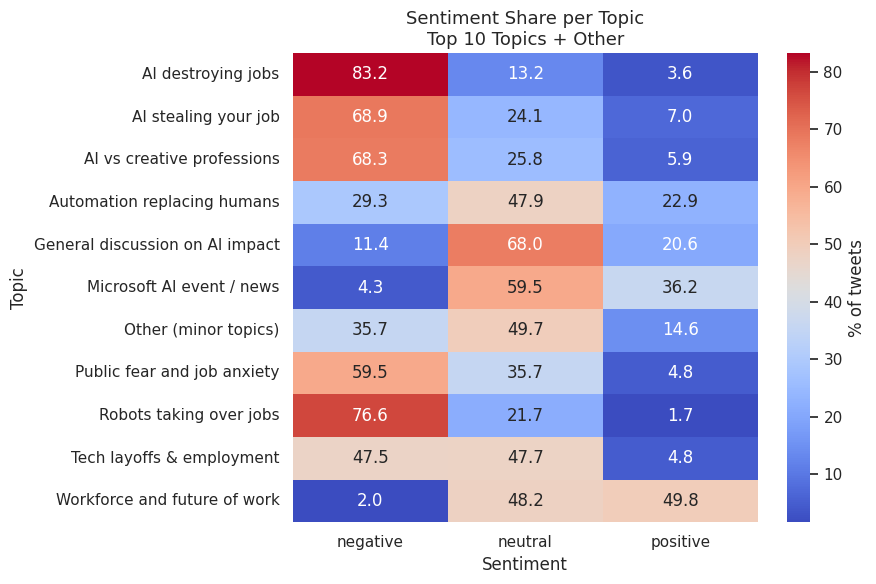

In [56]:
plt.figure(figsize=(9, 6))
sns.heatmap(cross_pct[sent_order], annot=True, fmt='.1f',
            cmap='coolwarm', cbar_kws={'label': '% of tweets'})
plt.title('Sentiment Share per Topic\nTop 10 Topics + Other', fontsize=13)
plt.ylabel('Topic')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

In [58]:
import numpy as np

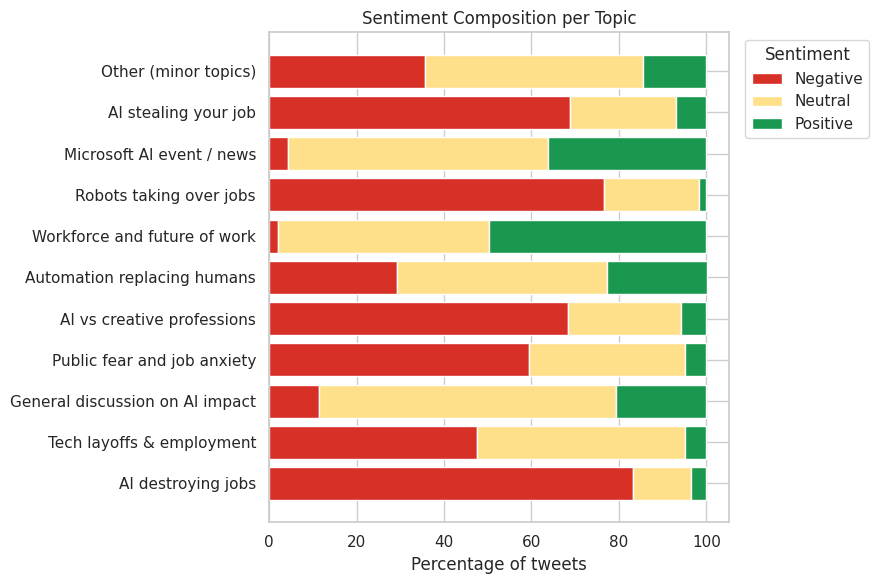

In [60]:
stack_df = cross_pct[sent_order]
stack_df = stack_df.loc[topic_names.values()]  # reorder rows to match topic labels
stack_df = stack_df.dropna()  # remove any topics not found

fig, ax = plt.subplots(figsize=(9,6))
bottom = np.zeros(len(stack_df))

colors = {'negative':'#d73027', 'neutral':'#fee08b', 'positive':'#1a9850'}

for sent in sent_order:
    ax.barh(stack_df.index,
            stack_df[sent],
            left=bottom,
            color=colors[sent],
            label=sent.capitalize())
    bottom += stack_df[sent].values

ax.set_xlabel('Percentage of tweets')
ax.set_title('Sentiment Composition per Topic')
ax.legend(title='Sentiment', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()